In [1]:
import pandas as pd
import numpy as np

In [38]:
bs=pd.read_csv('부산광역시데이터셋_최종.csv', encoding='euckr')
bs

,index_부산 보행등,관리번호,구,동,지번,교차로,고가,구분,재질,종류,...,스마트 음향신호기,음향신호기,전체신호등,주민센터,지하철,터미널,편의점,약국,병원,관할구별 시각장애인 수
0,1,9-945-07,해운대구,석대동,538-2,NaN,지상,보행등,LED,1면2색,...,64.176430,470.833404,64.176430,1022.863654,314.344945,4231.693661,145.445152,814.169768,557.720095,1724
1,2,9-945-02,해운대구,석대동,514-3,NaN,지상,보행등,LED,1면2색,...,60.387322,487.416004,60.387322,1042.188031,306.005236,4246.960340,133.241979,811.377867,575.154499,1724
2,3,9-943-07,해운대구,우동,977-8,NaN,지상,보행등,LED,1면2색,...,93.621086,18.921870,18.921870,211.149550,499.571548,1680.802262,285.997005,19.001587,19.001587,1724
3,4,9-943-03,해운대구,우동,977-8,NaN,지상,보행등,LED,1면2색,...,106.553277,31.532652,31.532652,199.002832,490.075206,1673.688035,274.359834,31.584851,31.584851,1724
4,5,9-942-12,해운대구,반송동,62-605,NaN,지상,보행등,LED,1면2색,...,22.034601,67.417662,22.034601,383.085229,355.408493,7248.261659,150.637497,50.977776,39.082138,1724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,1-002-10,중구,중앙동6가,Mar-76,부산데파트,지상,보행등,LED,1면2색,...,183.708207,42.195113,42.195113,284.405242,250.403414,711.740290,85.875810,88.657403,68.252058,312
9050,9051,1-002-08,중구,중앙동6가,Mar-76,부산데파트,지상,보행등,LED,1면2색,...,235.977296,63.694237,63.694237,310.892781,301.131537,685.109598,115.136919,118.531701,77.334476,312
9051,9052,1-002-02,중구,중앙동6가,Mar-76,부산데파트,지상,보행등,LED,1면2색,...,236.268513,48.693005,48.693005,292.922164,302.739372,672.012179,124.810210,128.102822,59.278163,312
9052,9053,1-001-06,중구,동광동1가,45,광복동입구,지상,보행등,LED,1면2색,...,47.509757,216.371851,47.509757,371.050538,77.510091,884.281205,38.117834,47.473434,47.473434,312


In [3]:
bs.columns

Index(['index_부산 보행등', '관리번호', '구', '동', '지번', '교차로', '고가', '구분', '재질', '종류',
       '신호등종류', '경도', '위도', '교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원',
       '스마트 음향신호기', '음향신호기', '전체신호등', '주민센터', '지하철', '터미널', '편의점', '약국', '병원',
       '관할구별 시각장애인 수'],
      dtype='object')

In [4]:
x_data = bs[['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원','관할구별 시각장애인 수']] #변수 여러개
target = bs[['스마트 음향신호기']]

In [5]:
import statsmodels.api as sm

x_data1 = sm.add_constant(x_data, has_constant = "add")

In [6]:
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              스마트 음향신호기   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     2430.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        01:44:45   Log-Likelihood:                -71118.
No. Observations:                9054   AIC:                         1.423e+05
Df Residuals:                    9040   BIC:                         1.424e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -456.7675     33.069    -13.813      0.000    -521.589    -391.946
교육시설            -0.0145      0.002     -8.126      0.000      -0.018      -0.011
도서관              0.0300      0.002     14.921      0.000       0.026       0.034
버스정류소            0.5156      0.074      7.013      0.000       0.371       0.660
복지관             -0.1363      0.011    -12.459      0.000      -0.158      -0.115
시각장애인협회          0.0088      0.002      3.980      0.000       0.004       0.013
안마원              0.3451      0.009     39.617      0.000       0.328       0.362
주민센터            -0.2252      0.009    -24.305      0.000      -0.243      -0.207
지하철              0.0287      0.006      5.029      0.000       0.018       0.040
터미널              0.0131      0.004      3.298      0.001       0.005       0.021
편의점              0.0359      0.024      1.526      0.127      -0.010       0.082
약국               0.3458      0.016     21.274      0.000       0.314       0.378
병원               0.5981      0.020     29.398      0.000       0.558       0.638
관할구별 시각장애인 수     0.0668      0.019      3.567      0.000       0.030       0.104
==============================================================================
Omnibus:                     3291.748   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51293.624
Skew:                           1.319   Prob(JB):                         0.00
Kurtosis:                      14.358   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:


bs=bs.drop(['index_부산 보행등', '관리번호', '구', '동', '지번', '교차로', '고가', '구분', '재질', '종류','신호등종류', '경도', '위도'],axis=1)

In [8]:
heatmap_data=bs

In [9]:
bs.corr()

,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,스마트 음향신호기,음향신호기,전체신호등,주민센터,지하철,터미널,편의점,약국,병원,관할구별 시각장애인 수
교육시설,1.000000,0.351734,0.177468,0.646405,0.438889,0.704852,0.509210,0.561819,0.518057,0.737025,0.747769,0.783145,0.381254,0.538096,0.548819,-0.509429
도서관,0.351734,1.000000,0.155850,0.403211,0.787443,0.401409,0.473786,0.515428,0.457286,0.413348,0.651778,0.556749,0.179700,0.311617,0.373284,-0.279042
버스정류소,0.177468,0.155850,1.000000,0.236680,0.211825,0.262415,0.323526,0.298425,0.320157,0.181547,0.227048,0.175303,0.259776,0.291150,0.342392,-0.109575
복지관,0.646405,0.403211,0.236680,1.000000,0.563049,0.902488,0.711810,0.707141,0.707171,0.673940,0.786841,0.688880,0.540575,0.703948,0.691005,-0.478927
시각장애인협회,0.438889,0.787443,0.211825,0.563049,1.000000,0.600511,0.597862,0.628555,0.577783,0.575608,0.776473,0.709166,0.305091,0.476168,0.502014,-0.334977
안마원,0.704852,0.401409,0.262415,0.902488,0.600511,1.000000,0.792326,0.776661,0.793042,0.763296,0.836734,0.765558,0.553678,0.751699,0.740055,-0.524410
스마트 음향신호기,0.509210,0.473786,0.323526,0.711810,0.597862,0.792326,1.000000,0.926087,0.984073,0.558027,0.708487,0.618681,0.508393,0.776010,0.783309,-0.384955
음향신호기,0.561819,0.515428,0.298425,0.707141,0.628555,0.776661,0.926087,1.000000,0.951425,0.570571,0.764796,0.665189,0.463592,0.736863,0.745400,-0.409497
전체신호등,0.518057,0.457286,0.320157,0.707171,0.577783,0.793042,0.984073,0.951425,1.000000,0.549773,0.707377,0.626518,0.496388,0.758982,0.771105,-0.382496
주민센터,0.737025,0.413348,0.181547,0.673940,0.575608,0.763296,0.558027,0.570571,0.549773,1.000000,0.798136,0.792819,0.377384,0.591929,0.651834,-0.535965


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os 
if os.name =='nt':
    font_family ="Malgun Gothic"
else:
    font_family ="AppleGothic"
    
sns.set(font=font_family, rc={"axes.unicode_minus": False})

<AxesSubplot:title={'center':'Person Correlation of Features'}>

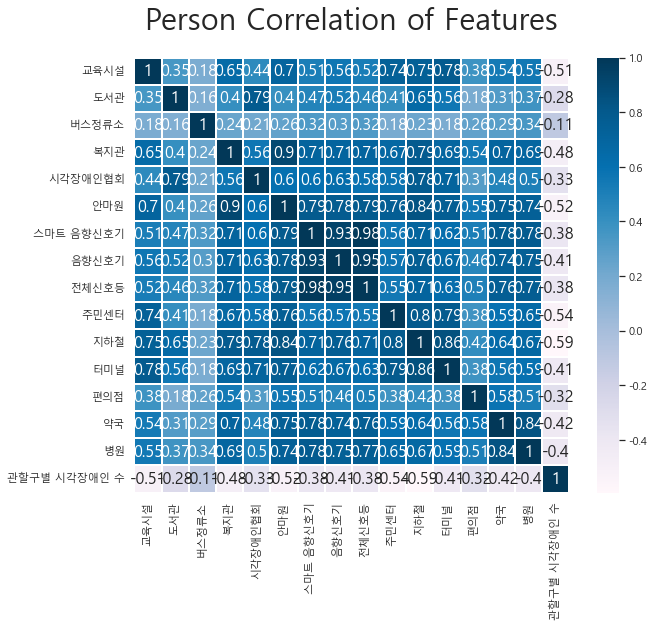

In [11]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 30)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


In [12]:
se=pd.read_csv('서울데이터셋_최종.csv', encoding='euckr')
se.head()

,신호등_index,관리번호,관할구,주소,X좌표,Y좌표,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,음향신호기,주민센터,지하철,터미널,편의점,약국,병원,관할구별 시각장애인 수
0,1,03-0000013905,강남구,강남구 대치동 973-12 대,205374.9878,544360.3235,8828.504490,1272.720157,63.539989,1346.410759,2169.162096,465.230504,1.183158,284.085577,522.826511,4951.938755,38.526782,41.464028,37.449544,1551
1,2,03-0000064343,강남구,강남구 역삼동 712 공,203974.3625,544362.8187,7609.817483,2564.026031,56.791601,889.563384,3466.957845,1500.918235,1.322839,346.584163,724.241328,3578.020909,164.459202,109.535357,84.957371,1551
2,3,03-0000065097,강남구,강남구 역삼동 633-16 대,202722.1824,544404.9315,6557.443582,3724.820316,88.930535,605.690941,4686.685859,1433.985553,3.073867,469.181845,293.056979,2362.775142,168.592329,26.863093,26.863093,1551
3,4,03-0000014413,강남구,강남구 삼성동 186-6천,205839.8146,546182.1334,8603.064701,2586.538263,110.674797,2188.520623,3196.645816,1718.649139,330.012641,325.610619,2239.093625,3299.653565,93.347071,263.335148,247.677596,1551
4,5,03-0000066954,강남구,강남구 일원동 306유,207106.7500,544477.2562,10352.677580,1048.237676,396.732442,921.576718,1160.556333,891.721938,397.458902,792.651712,644.402218,4058.568839,442.528962,541.561810,599.914988,1551


In [13]:
se.columns

Index(['신호등_index', '관리번호', '관할구', '주소', 'X좌표', 'Y좌표', '교육시설', '도서관', '버스정류소',
       '복지관', '시각장애인협회', '안마원', '음향신호기', '주민센터', '지하철', '터미널', '편의점', '약국',
       '병원', '관할구별 시각장애인 수'],
      dtype='object')

In [14]:
x_data = se[['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원','관할구별 시각장애인 수']] #변수 여러개
target = se[['음향신호기']]

In [15]:
import statsmodels.api as sm

x_data1 = sm.add_constant(x_data, has_constant = "add")

In [16]:
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  음향신호기   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     408.4
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        01:44:48   Log-Likelihood:            -1.5246e+05
No. Observations:               24073   AIC:                         3.049e+05
Df Residuals:                   24059   BIC:                         3.051e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -61.1592      4.594    -13.312      0.000     -70.164     -52.154
교육시설            -0.0020      0.000     -5.648      0.000      -0.003      -0.001
도서관              0.0072      0.001     12.592      0.000       0.006       0.008
버스정류소            0.2187      0.014     15.543      0.000       0.191       0.246
복지관              0.0122      0.001     10.506      0.000       0.010       0.014
시각장애인협회          0.0110      0.001     18.206      0.000       0.010       0.012
안마원             -0.0016      0.001     -1.237      0.216      -0.004       0.001
주민센터             0.0486      0.003     14.680      0.000       0.042       0.055
지하철             -0.0124      0.001    -15.337      0.000      -0.014      -0.011
터미널             -0.0023      0.000     -6.778      0.000      -0.003      -0.002
편의점              0.0013      0.008      0.163      0.871      -0.014       0.016
약국               0.0096      0.010      0.953      0.340      -0.010       0.029
병원               0.2898      0.012     25.021      0.000       0.267       0.313
관할구별 시각장애인 수     0.0228      0.002     12.112      0.000       0.019       0.027
==============================================================================
Omnibus:                    14514.702   Durbin-Watson:                   0.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331213.593
Skew:                           2.484   Prob(JB):                         0.00
Kurtosis:                      20.479   Cond. No.                     6.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
data = se[['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원','관할구별 시각장애인 수','음향신호기']]

heatmap_data=data

<AxesSubplot:title={'center':'Person Correlation of Features'}>

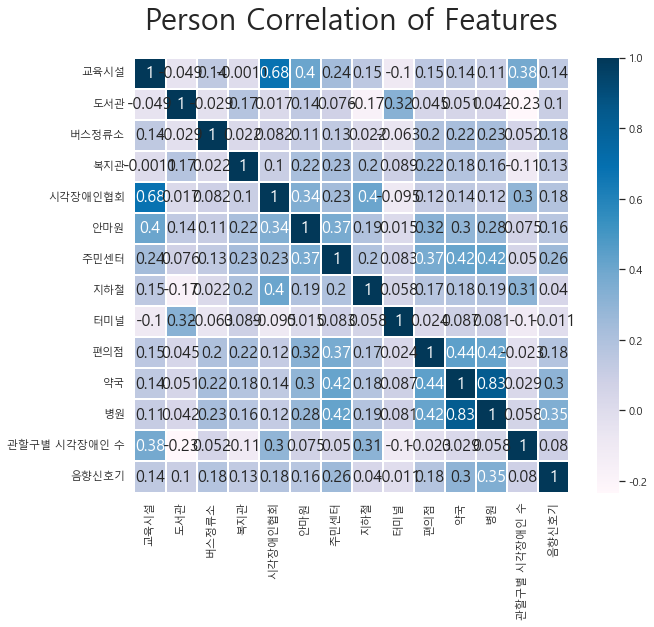

In [18]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 30),
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0
square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


In [19]:
df=pd.read_csv('부산 버퍼 150m 데이터셋.csv', encoding='euckr')
df.head()

,index_부산 보행등,관리번호,구,동,지번,교차로,고가,구분,재질,종류,...,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원
0,1,9-945-07,해운대구,석대동,538-2,NaN,지상,보행등,LED,1면2색,...,2,0,0,0,0,0,0,1,0,0
1,2,9-945-02,해운대구,석대동,514-3,NaN,지상,보행등,LED,1면2색,...,1,0,0,0,0,0,0,1,0,0
2,3,9-943-07,해운대구,우동,977-8,NaN,지상,보행등,LED,1면2색,...,2,0,0,0,0,0,0,0,1,4
3,4,9-943-03,해운대구,우동,977-8,NaN,지상,보행등,LED,1면2색,...,2,0,0,0,0,0,0,0,1,4
4,5,9-942-12,해운대구,반송동,62-605,NaN,지상,보행등,LED,1면2색,...,2,1,0,0,0,0,0,0,2,11


In [20]:
df.columns

Index(['index_부산 보행등', '관리번호', '구', '동', '지번', '교차로', '고가', '구분', '재질', '종류',
       '신호등종류', '경도', '위도', '교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원',
       '주민센터', '지하철', '터미널', '편의점', '약국', '병원'],
      dtype='object')

In [21]:
df['교육시설'].value_counts()

0    9052
1       2
Name: 교육시설, dtype: int64

In [22]:
df['도서관'].value_counts()

0    9053
1       1
Name: 도서관, dtype: int64

In [23]:
df['버스정류소'].value_counts()

2     1671
4     1584
0     1237
3      936
6      851
5      781
1      581
7      510
8      398
9      198
10     160
11      60
12      38
13      14
14      10
15       7
16       5
19       4
18       3
17       3
21       2
20       1
Name: 버스정류소, dtype: int64

In [24]:
df['복지관'].value_counts()

0    8659
1     332
2      63
Name: 복지관, dtype: int64

In [25]:
df['시각장애인협회'].value_counts()

0    9047
1       7
Name: 시각장애인협회, dtype: int64

In [26]:
df['안마원'].value_counts()

0    8483
1     523
2      46
3       2
Name: 안마원, dtype: int64

In [27]:
df['주민센터'].value_counts()

0    8373
1     678
2       3
Name: 주민센터, dtype: int64

In [28]:
df['지하철'].value_counts()

0    9054
Name: 지하철, dtype: int64

In [29]:
df['터미널'].value_counts()

0    9040
1      14
Name: 터미널, dtype: int64

In [30]:
df['편의점'].value_counts()

0     4494
1     2505
2     1195
3      511
4      191
5      101
6       37
7        9
8        6
9        4
10       1
Name: 편의점, dtype: int64

In [31]:
df['약국'].value_counts()

0     5855
1     1327
2      749
3      423
4      243
5      181
6      126
7       64
8       33
9       24
10      13
11      10
12       5
13       1
Name: 약국, dtype: int64

In [32]:
df['병원'].value_counts()

0     4851
1      998
2      648
3      491
4      349
      ... 
93       1
73       1
64       1
80       1
47       1
Name: 병원, Length: 64, dtype: int64

In [33]:
x_data = df[['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원']] #변수 여러개
target = bs[['스마트 음향신호기']]

In [34]:
import statsmodels.api as sm

x_data1 = sm.add_constant(x_data, has_constant = "add")
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              스마트 음향신호기   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     93.35
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          1.20e-201
Time:                        01:44:49   Log-Likelihood:                -77435.
No. Observations:                9054   AIC:                         1.549e+05
Df Residuals:                    9042   BIC:                         1.550e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1244.4873     23.255     53.514      0.000    1198.902    1290.073
교육시설        -923.8118    887.055     -1.041      0.298   -2662.641     815.018
도서관         -542.1759   1254.362     -0.432      0.666   -3001.010    1916.658
버스정류소        -73.3028      5.055    -14.500      0.000     -83.213     -63.393
복지관         -103.6285     55.635     -1.863      0.063    -212.686       5.428
시각장애인협회      -29.4660    486.452     -0.061      0.952    -983.023     924.091
안마원          -35.2615     51.490     -0.685      0.493    -136.193      65.670
주민센터        -244.1537     50.330     -4.851      0.000    -342.813    -145.495
지하철          1.01e-12   9.88e-13      1.023      0.307   -9.26e-13    2.95e-12
터미널         -114.5473    336.136     -0.341      0.733    -773.450     544.355
편의점         -197.0179     12.671    -15.549      0.000    -221.855    -172.181
약국           -96.7126     13.590     -7.116      0.000    -123.352     -70.073
병원             9.1708      3.240      2.830      0.005       2.819      15.523
==============================================================================
Omnibus:                     6458.764   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91862.019
Skew:                           3.378   Prob(JB):                         0.00
Kurtosis:                      17.067   Cond. No.                     2.20e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
label=pd.read_csv('부산_정답포함.csv', encoding='euckr')
label

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,관할구별 시각장애인 수,label,smart_label
0,1,2417.879656,12705.060760,141.605483,1037.862825,12413.490090,1701.868620,1022.863654,314.344945,4231.693661,145.445152,814.169768,557.720095,1724,1,1
1,2,2435.553629,12720.660220,126.183552,1051.315521,12433.327920,1713.321603,1042.188031,306.005236,4246.960340,133.241979,811.377867,575.154499,1724,1,1
2,3,6444.897700,14024.588570,75.101932,1137.888200,9737.092056,777.585976,211.149550,499.571548,1680.802262,285.997005,19.001587,19.001587,1724,1,1
3,4,6458.035113,14035.173160,68.832494,1127.685462,9741.790396,787.771837,199.002832,490.075206,1673.688035,274.359834,31.584851,31.584851,1724,1,1
4,5,5933.995947,16237.446680,36.608591,39.897317,15465.223390,186.414343,383.085229,355.408493,7248.261659,150.637497,50.977776,39.082138,1724,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,13164.708470,9764.163274,59.501073,1150.794805,2943.170470,631.621888,284.405242,250.403414,711.740290,85.875810,88.657403,68.252058,312,1,0
9050,9051,13136.090140,9782.988604,82.203006,1146.496242,2923.297271,629.519271,310.892781,301.131537,685.109598,115.136919,118.531701,77.334476,312,1,0
9051,9052,13123.891020,9764.341811,65.867680,1129.115339,2908.745138,611.774408,292.922164,302.739372,672.012179,124.810210,128.102822,59.278163,312,1,0
9052,9053,13335.198000,9818.774662,59.812683,1087.443708,3100.839539,765.410954,371.050538,77.510091,884.281205,38.117834,47.473434,47.473434,312,1,1


In [45]:
label=label['smart_label']
label

0       1
1       1
2       1
3       1
4       1
       ..
9049    0
9050    0
9051    0
9052    1
9053    1
Name: smart_label, Length: 9054, dtype: int64

In [61]:
multi_model = sm.OLS(label, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            smart_label   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     114.1
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.17e-245
Time:                        02:04:29   Log-Likelihood:                -5686.7
No. Observations:                9054   AIC:                         1.140e+04
Df Residuals:                    9042   BIC:                         1.148e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1966      0.008     23.371      0.000       0.180       0.213
교육시설           0.7339      0.321      2.287      0.022       0.105       1.363
도서관           -0.2661      0.454     -0.586      0.558      -1.156       0.623
버스정류소          0.0174      0.002      9.494      0.000       0.014       0.021
복지관            0.0487      0.020      2.419      0.016       0.009       0.088
시각장애인협회        0.3600      0.176      2.046      0.041       0.015       0.705
안마원            0.1079      0.019      5.790      0.000       0.071       0.144
주민센터           0.1293      0.018      7.098      0.000       0.094       0.165
지하철        -9.084e-16   3.57e-16     -2.542      0.011   -1.61e-15   -2.08e-16
터미널           -0.4184      0.122     -3.440      0.001      -0.657      -0.180
편의점            0.0635      0.005     13.846      0.000       0.054       0.072
약국             0.0360      0.005      7.323      0.000       0.026       0.046
병원             0.0014      0.001      1.233      0.218      -0.001       0.004
==============================================================================
Omnibus:                    17246.073   Durbin-Watson:                   0.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.870
Skew:                           0.485   Prob(JB):                    3.69e-209
Kurtosis:                       1.733   Cond. No.                     2.20e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
re = pd.concat([x_data1, target], axis=1)
re

,const,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,스마트 음향신호기
0,1.0,0,0,2,0,0,0,0,0,0,1,0,0,64.176430
1,1.0,0,0,1,0,0,0,0,0,0,1,0,0,60.387322
2,1.0,0,0,2,0,0,0,0,0,0,0,1,4,93.621086
3,1.0,0,0,2,0,0,0,0,0,0,0,1,4,106.553277
4,1.0,0,0,2,1,0,0,0,0,0,0,2,11,22.034601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,1.0,0,0,5,0,0,0,0,0,0,3,1,4,183.708207
9050,1.0,0,0,5,0,0,0,0,0,0,3,1,2,235.977296
9051,1.0,0,0,5,0,0,0,0,0,0,3,1,2,236.268513
9052,1.0,0,0,5,0,0,0,0,0,0,5,3,12,47.509757


<AxesSubplot:title={'center':'Person Correlation of Features'}>

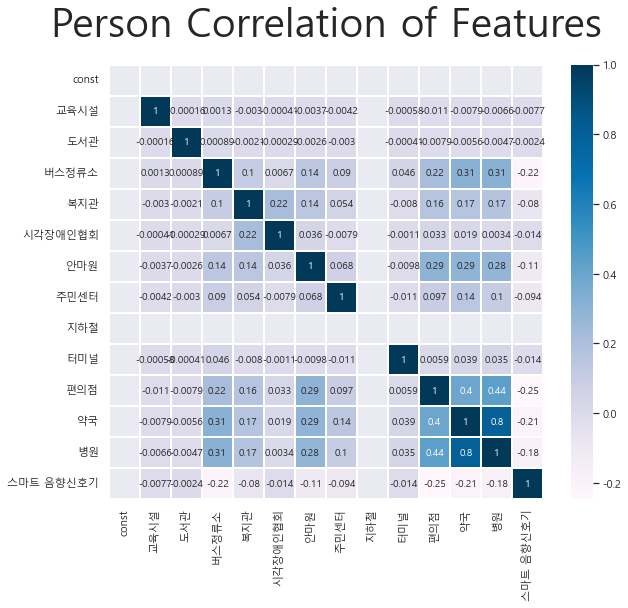

In [42]:
heatmap_data=re
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 40)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

In [46]:
re2 = pd.concat([re, label], axis=1)
re2

,const,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,스마트 음향신호기,smart_label
0,1.0,0,0,2,0,0,0,0,0,0,1,0,0,64.176430,1
1,1.0,0,0,1,0,0,0,0,0,0,1,0,0,60.387322,1
2,1.0,0,0,2,0,0,0,0,0,0,0,1,4,93.621086,1
3,1.0,0,0,2,0,0,0,0,0,0,0,1,4,106.553277,1
4,1.0,0,0,2,1,0,0,0,0,0,0,2,11,22.034601,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,1.0,0,0,5,0,0,0,0,0,0,3,1,4,183.708207,0
9050,1.0,0,0,5,0,0,0,0,0,0,3,1,2,235.977296,0
9051,1.0,0,0,5,0,0,0,0,0,0,3,1,2,236.268513,0
9052,1.0,0,0,5,0,0,0,0,0,0,5,3,12,47.509757,1


<AxesSubplot:title={'center':'Person Correlation of Features'}>

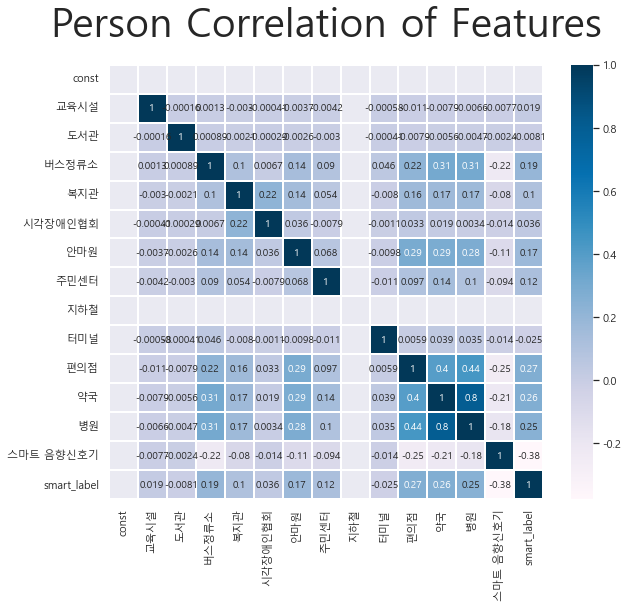

In [47]:
heatmap_data=re2
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 40)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

In [48]:
df2=pd.read_csv('부산 버퍼 1km 데이터셋.csv', encoding='euckr')
df2

,index_부산 보행등,관리번호,구,동,지번,교차로,고가,구분,재질,종류,...,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원
0,1,9-945-07,해운대구,석대동,538-2,NaN,지상,보행등,LED,1면2색,...,80,0,0,0,1,0,0,4,6,10
1,2,9-945-02,해운대구,석대동,514-3,NaN,지상,보행등,LED,1면2색,...,81,0,0,0,1,0,0,4,6,9
2,3,9-943-07,해운대구,우동,977-8,NaN,지상,보행등,LED,1면2색,...,45,0,0,1,1,0,0,26,13,66
3,4,9-943-03,해운대구,우동,977-8,NaN,지상,보행등,LED,1면2색,...,44,0,0,1,1,0,0,26,13,64
4,5,9-942-12,해운대구,반송동,62-605,NaN,지상,보행등,LED,1면2색,...,49,5,0,3,3,0,0,19,20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,1-002-10,중구,중앙동6가,Mar-76,부산데파트,지상,보행등,LED,1면2색,...,96,0,0,4,7,0,1,51,33,143
9050,9051,1-002-08,중구,중앙동6가,Mar-76,부산데파트,지상,보행등,LED,1면2색,...,95,0,0,4,7,0,1,50,35,145
9051,9052,1-002-02,중구,중앙동6가,Mar-76,부산데파트,지상,보행등,LED,1면2색,...,96,0,0,4,7,0,1,50,33,142
9052,9053,1-001-06,중구,동광동1가,45,광복동입구,지상,보행등,LED,1면2색,...,109,0,0,4,8,0,1,52,41,173


In [49]:
df2['교육시설'].value_counts()

0    8952
1     102
Name: 교육시설, dtype: int64

In [50]:
df2['도서관'].value_counts()

0    8976
1      78
Name: 도서관, dtype: int64

In [51]:
df2['버스정류소'].value_counts()

71     125
78     111
80     107
82     104
73     104
      ... 
190      3
179      2
189      1
203      1
202      1
Name: 버스정류소, Length: 202, dtype: int64

In [52]:
df2['복지관'].value_counts()

0     3760
1     1785
2     1563
3      769
4      574
5      336
6      164
7       58
9       21
10      17
8        6
11       1
Name: 복지관, dtype: int64

In [53]:
df2['시각장애인협회'].value_counts()

0    8979
1      75
Name: 시각장애인협회, dtype: int64

In [54]:
df2['안마원'].value_counts()

0     3668
1     2139
2     1002
3      913
4      481
5      376
6      206
7      149
8       74
9       32
10      14
Name: 안마원, dtype: int64

In [55]:
df2['주민센터'].value_counts()

0     2330
2     1715
1     1712
3     1392
4      922
5      400
6      280
7      104
8       76
9       55
11      27
10      21
12      20
Name: 주민센터, dtype: int64

In [56]:
df2['지하철'].value_counts()

0    9054
Name: 지하철, dtype: int64

In [57]:
df2['터미널'].value_counts()

0    8568
1     455
2      31
Name: 터미널, dtype: int64

In [58]:
df2['편의점'].value_counts()

0     420
2     370
1     320
23    312
3     274
     ... 
83      3
90      2
76      2
87      1
92      1
Name: 편의점, Length: 95, dtype: int64

In [59]:
df2['약국'].value_counts()

0     1281
15     370
1      306
2      300
18     255
      ... 
77       4
79       3
82       2
80       1
76       1
Name: 약국, Length: 81, dtype: int64

In [60]:
df2['병원'].value_counts()

0      1079
1       347
2       191
5       121
21      100
       ... 
351       1
247       1
249       1
335       1
193       1
Name: 병원, Length: 328, dtype: int64

In [63]:
x_data = df2[['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원']] #변수 여러개
target = bs[['스마트 음향신호기']]

In [64]:
import statsmodels.api as sm

x_data1 = sm.add_constant(x_data, has_constant = "add")
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              스마트 음향신호기   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     315.2
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:04:58   Log-Likelihood:                -76452.
No. Observations:                9054   AIC:                         1.529e+05
Df Residuals:                    9042   BIC:                         1.530e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2017.0248     27.974     72.105      0.000    1962.190    2071.859
교육시설          78.9205    113.996      0.692      0.489    -144.537     302.378
도서관         -492.1211    129.279     -3.807      0.000    -745.537    -238.705
버스정류소         -9.5111      0.475    -20.007      0.000     -10.443      -8.579
복지관          -37.7503      9.048     -4.172      0.000     -55.487     -20.013
시각장애인협회       97.9524    136.769      0.716      0.474    -170.147     366.051
안마원           79.5678      9.945      8.001      0.000      60.073      99.062
주민센터          63.3998     12.020      5.275      0.000      39.838      86.961
지하철        -6.172e-14   4.43e-14     -1.392      0.164   -1.49e-13    2.52e-14
터미널           67.0753     49.381      1.358      0.174     -29.722     163.873
편의점          -34.5277      1.847    -18.692      0.000     -38.149     -30.907
약국           -18.0467      2.537     -7.113      0.000     -23.020     -13.073
병원             5.4239      0.449     12.070      0.000       4.543       6.305
==============================================================================
Omnibus:                     6049.505   Durbin-Watson:                   0.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83325.268
Skew:                           3.082   Prob(JB):                         0.00
Kurtosis:                      16.523   Cond. No.                     2.59e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.45e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
multi_model = sm.OLS(label, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            smart_label   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     100.9
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          1.50e-217
Time:                        02:05:33   Log-Likelihood:                -5751.4
No. Observations:                9054   AIC:                         1.153e+04
Df Residuals:                    9042   BIC:                         1.161e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.011     14.872      0.000       0.147       0.191
교육시설           0.0645      0.046      1.392      0.164      -0.026       0.155
도서관            0.2579      0.053      4.912      0.000       0.155       0.361
버스정류소         -0.0003      0.000     -1.402      0.161      -0.001       0.000
복지관            0.0172      0.004      4.673      0.000       0.010       0.024
시각장애인협회       -0.0305      0.056     -0.550      0.582      -0.139       0.078
안마원           -0.0101      0.004     -2.497      0.013      -0.018      -0.002
주민센터           0.0209      0.005      4.276      0.000       0.011       0.030
지하철         3.924e-17    1.8e-17      2.179      0.029    3.94e-18    7.46e-17
터미널           -0.0191      0.020     -0.950      0.342      -0.058       0.020
편의점            0.0074      0.001      9.870      0.000       0.006       0.009
약국             0.0018      0.001      1.723      0.085      -0.000       0.004
병원            -0.0004      0.000     -2.236      0.025      -0.001   -5.04e-05
==============================================================================
Omnibus:                   132127.378   Durbin-Watson:                   0.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.637
Skew:                           0.424   Prob(JB):                    3.78e-212
Kurtosis:                       1.636   Cond. No.                     2.59e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.45e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
re = pd.concat([x_data1, target], axis=1)
re

,const,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,스마트 음향신호기
0,1.0,0,0,80,0,0,0,1,0,0,4,6,10,64.176430
1,1.0,0,0,81,0,0,0,1,0,0,4,6,9,60.387322
2,1.0,0,0,45,0,0,1,1,0,0,26,13,66,93.621086
3,1.0,0,0,44,0,0,1,1,0,0,26,13,64,106.553277
4,1.0,0,0,49,5,0,3,3,0,0,19,20,45,22.034601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,1.0,0,0,96,0,0,4,7,0,1,51,33,143,183.708207
9050,1.0,0,0,95,0,0,4,7,0,1,50,35,145,235.977296
9051,1.0,0,0,96,0,0,4,7,0,1,50,33,142,236.268513
9052,1.0,0,0,109,0,0,4,8,0,1,52,41,173,47.509757


<AxesSubplot:title={'center':'Person Correlation of Features'}>

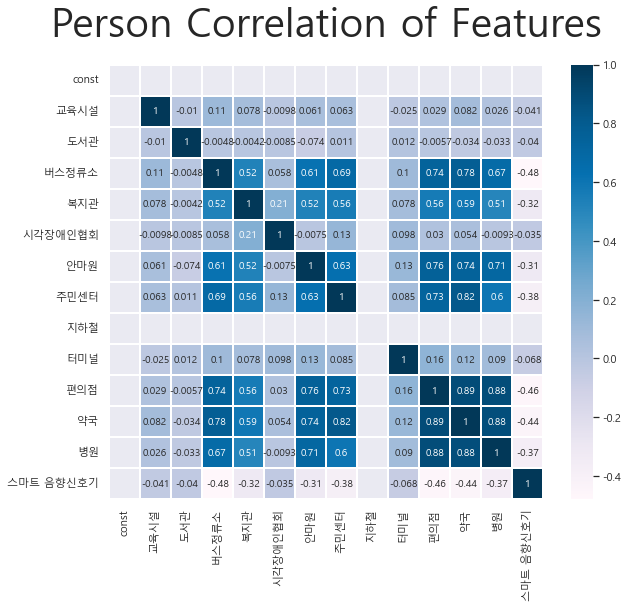

In [67]:
heatmap_data=re
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 40)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

In [68]:
re2 = pd.concat([re, label], axis=1)
re2

,const,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,스마트 음향신호기,smart_label
0,1.0,0,0,80,0,0,0,1,0,0,4,6,10,64.176430,1
1,1.0,0,0,81,0,0,0,1,0,0,4,6,9,60.387322,1
2,1.0,0,0,45,0,0,1,1,0,0,26,13,66,93.621086,1
3,1.0,0,0,44,0,0,1,1,0,0,26,13,64,106.553277,1
4,1.0,0,0,49,5,0,3,3,0,0,19,20,45,22.034601,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,1.0,0,0,96,0,0,4,7,0,1,51,33,143,183.708207,0
9050,1.0,0,0,95,0,0,4,7,0,1,50,35,145,235.977296,0
9051,1.0,0,0,96,0,0,4,7,0,1,50,33,142,236.268513,0
9052,1.0,0,0,109,0,0,4,8,0,1,52,41,173,47.509757,1


<AxesSubplot:title={'center':'Person Correlation of Features'}>

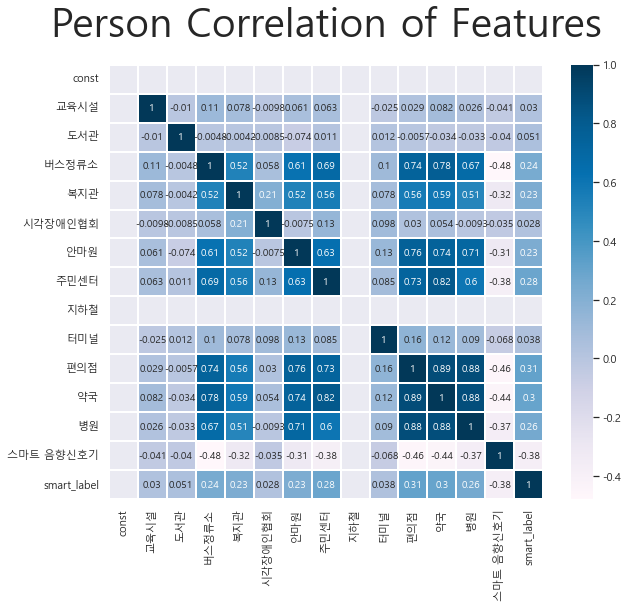

In [69]:
heatmap_data=re2
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 40)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})